In [35]:
"""
out = shrink_p_1_2(v, reg::Real)
Compute minimizer of ``1/2 |v − x|^2 + reg |x|^p``
for `p=1/2` when `v` is real and nonnegative.
In:
* `v` scalar, vector, or array of (real, nonnegative) input values
* `reg` regularization parameter
Out:
* `xh` solution to minimization problem for each element of `v`
(same size as `v`)
"""
function shrink_p_1_2(v, reg::Real)
    xh = zeros(size(v))
  fun = (v) -> 4 / 3. * v * cos( 1 ./3 * acos(-(3^(3/2)*reg) / (4*v^(3/2))))^2
  big = v .> 3/2. * reg^(2/3.)
  xh[big] = fun.(v[big])
return xh
end 

shrink_p_1_2

In [23]:
using Plots

In [30]:
"""
out = shrink_p_1_2(v, reg::Real)
Compute minimizer of ``1/2 |v − x|^2 + reg |x|^p``
for `p=1/2` when `v` is real and nonnegative.
In:
* `v` scalar, vector, or array of (real, nonnegative) input values
* `reg` regularization parameter
Out:
* `xh` solution to minimization problem for each element of `v`
(same size as `v`)
"""
function shrink_p_1_2(v, reg::Real)
    (m,n)  = size(v)
    xhat = zeros(m,n)
    compare = 3/2 * reg^(2/3)
    
    for i in 1:n
        for j in i:m
            if v[j, i] > compare
                xhat[j, i] = 4/3  * v[j,i] * cos( 1 /3 * acos(-(3^(3/2)*reg) / (4*v[j,i]^(3/2))))^2
            else 
                xhat[j,i] = 0
            end 
        end       
    end 
                
    return xhat
end 

shrink_p_1_2

In [31]:
reg = 2 
v = LinRange(0, 8*reg, 801)


801-element LinRange{Float64}:
 0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,…,15.9,15.92,15.94,15.96,15.98,16.0

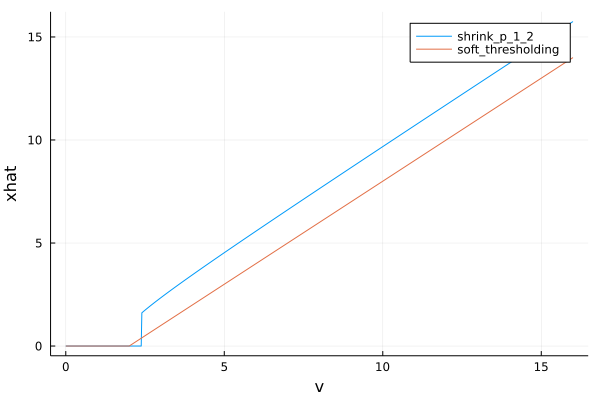

In [38]:
reg = 2 
v = LinRange(0, 8*reg, 801)
xhat = shrink_p_1_2(v, 2)
plot(v, xhat, label ="shrink_p_1_2")
plot!(v, soft_thresholding(v, reg), label="soft_thresholding")
plot!(xlabel ="v", ylabel ="xhat")

In [37]:
function soft_thresholding(v, reg)
    xh = zeros(size(v))
    fun1 = (v) -> v - reg
    fun2 = (v) -> v + reg
    
    big = v .> reg
    small = v .< -reg
    
    xh[big] = fun1.(v[big])
    xh[small] = fun2.(v[small])
    return xh
end

soft_thresholding (generic function with 1 method)